In [ ]:
install.packages('TSA')
install.packages('forecast')
install.packages('tseries')
install.packages('normtest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’, ‘leaps’, ‘locfit’, ‘tseries’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(TSA)
library(forecast)
library(tseries)
library(normtest)


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 



In [ ]:
install.packages('tidyverse')
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ readr::spec()   masks TSA::spec()



In [ ]:
library(readr)

In [ ]:
msft <- read.csv("msft1.csv")

In [ ]:
msft$Close.Last <- as.numeric(gsub('[$]',' ',msft$Close.Last))

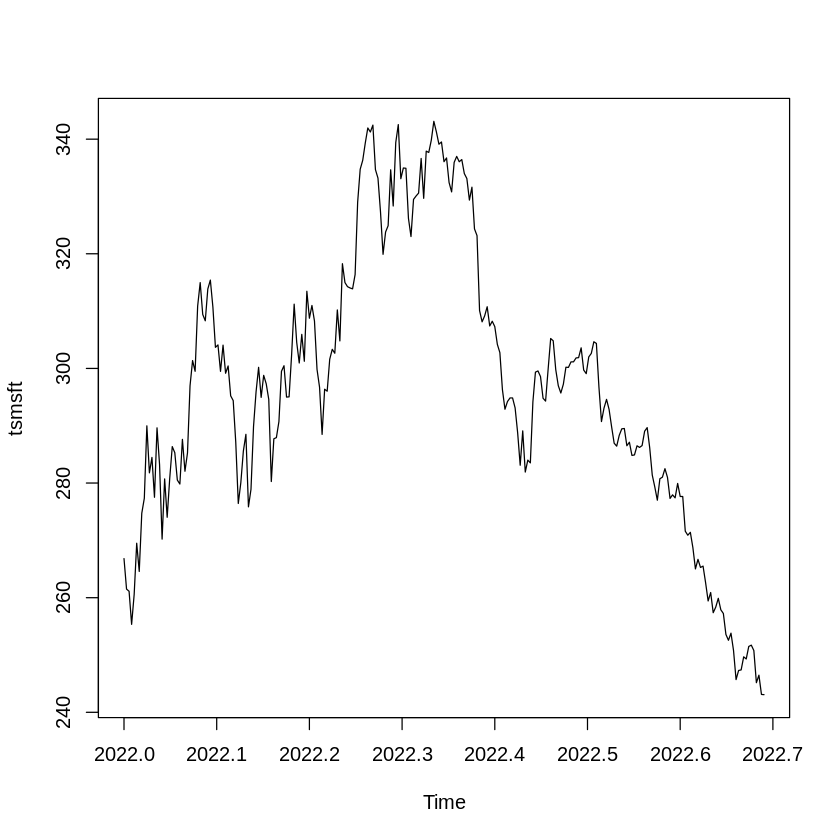

In [ ]:
tsmsft <- ts(msft$Close.Last,frequency = 365,start=c(2022,1))
plot(tsmsft)

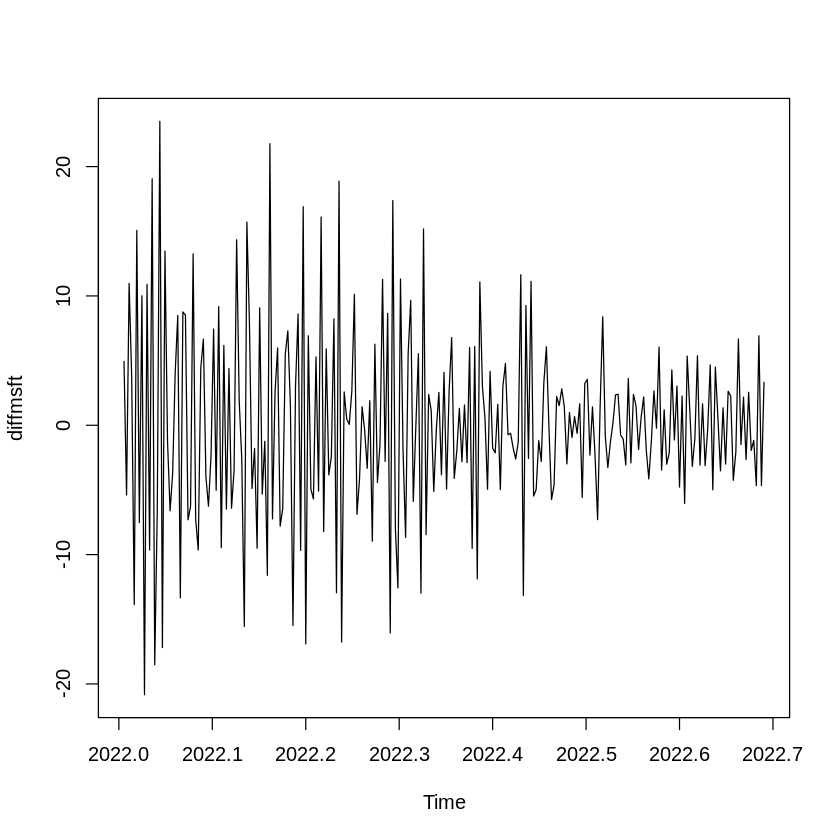

In [ ]:
diffmsft <- diff(tsmsft,differences = 2)
plot(diffmsft)

In [ ]:
adf.test(diffmsft)

Warning message in adf.test(diffmsft):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diffmsft
Dickey-Fuller = -9.3809, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o o o o o o x o o o  o  o  o 
1 x o o o o o o o o o o  o  o  o 
2 x x o o o o o o o o o  o  o  o 
3 x x o o o o o o o o o  o  o  o 
4 x x o o o o o o o o o  o  o  o 
5 x x o x o o o o o o o  o  o  o 
6 x x x x x o o o o o o  o  o  o 
7 x x x x o o x o o o o  o  o  o 


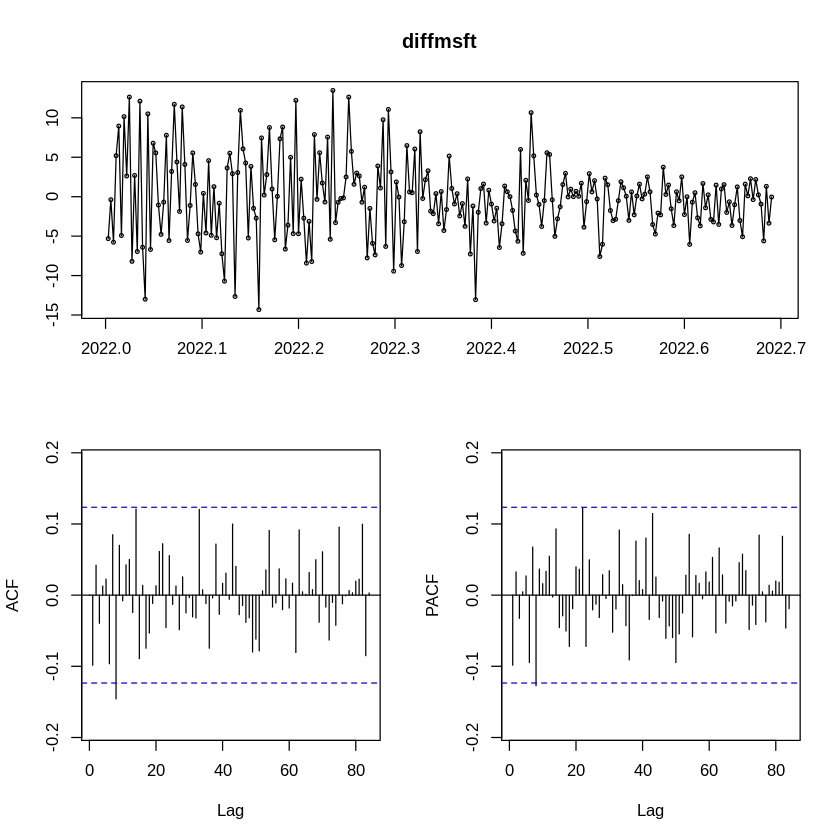

In [ ]:
tsdisplay(diffmsft)
eacf(diffmsft)

In [ ]:
#Dari hasil plot acf, pacf, dan eacf nya, maka akan dicoba beberapa model yang kemungkinan cocok
model1 <- Arima(tsmsft, order=c(0,1,0))
model2 <- Arima(tsmsft, order=c(0,1,1))
model3 <- Arima(tsmsft, order=c(1,1,1))
model4 <- Arima

In [ ]:
model1
model2
model3
cbind(model1,model2,model3)

Series: tsmsft 
ARIMA(0,1,0) 

sigma^2 = 24.28:  log likelihood = -759.48
AIC=1520.95   AICc=1520.97   BIC=1524.48

Series: tsmsft 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.0922
s.e.   0.0608

sigma^2 = 24.16:  log likelihood = -758.33
AIC=1520.67   AICc=1520.72   BIC=1527.73

Series: tsmsft 
ARIMA(1,1,1) 

Coefficients:
          ar1     ma1
      -0.4397  0.3442
s.e.   0.3678  0.3825

sigma^2 = 24.2:  log likelihood = -758.06
AIC=1522.13   AICc=1522.22   BIC=1532.72

model1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
coef                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [ ]:
#Modelnya adalah ARIMA(1,1,1)
fit<-Arima(tsmsft,order=c(1,1,1))
fit

Series: tsmsft 
ARIMA(1,1,1) 

Coefficients:
          ar1     ma1
      -0.4397  0.3442
s.e.   0.3678  0.3825

sigma^2 = 24.2:  log likelihood = -758.06
AIC=1522.13   AICc=1522.22   BIC=1532.72


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)
Q* = 43.234, df = 49, p-value = 0.705

Model df: 2.   Total lags used: 51



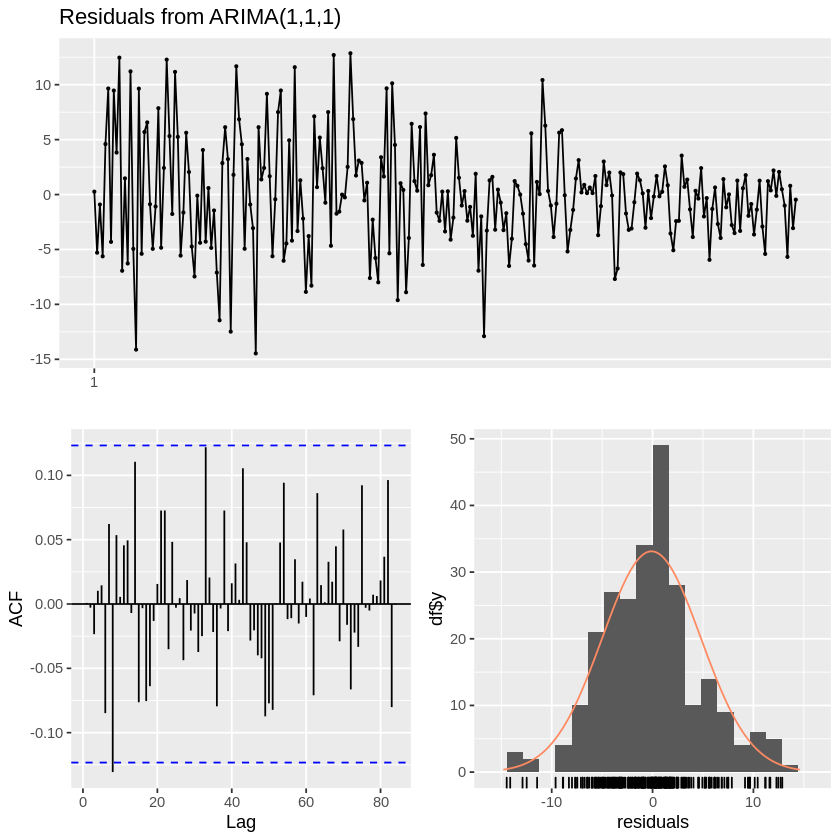

In [ ]:
#cek independensi residual
#h0 = residual tidak mengandung korelasi
#h1 = residual mengandung korelasi
checkresiduals(fit)

In [ ]:
#cek normalitas residual
#h0 = residual berdistribusi normal
#h1 = residual tidak berdistribusi normal
jb.norm.test(tsmsft,nrepl=2000)


	Jarque-Bera test for normality

data:  tsmsft
JB = 2.4847, p-value = 0.242
